mini project for Data Analysis module 2

Yoga Data

In [1]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
yoga_stress_df = pd.read_excel("raw_data/Table_1_Reduce stress and the risk of burnout by using yoga techniques. Pilot study.xlsx")
print(yoga_stress_df.head(10))

  How long have you been practicing yoga regularly?  \
0                                         6-7 years   
1                                         2-3 years   
2                                         2-3 years   
3                                         4-5 years   
4                                       11-14 years   
5                                         4-5 years   
6                                         2-3 years   
7                                         2-3 years   
8                                         2-3 years   
9                                         4-5 years   

  What was the motivation for starting the practice of yoga  Unnamed: 2  \
0                                   Other motivation                NaN   
1         Need to stretch the body, Stress reduction                NaN   
2                 Stress reduction, Other motivation                NaN   
3  Need to stretch the body, Build strength , Str...                NaN   
4                  

In [3]:
df_renamed = yoga_stress_df.rename(columns = {'How long have you been practicing yoga regularly?': "Length of practice",
       'What was the motivation for starting the practice of yoga': "Motivation",
        'Effects of yoga practice ': "Effects"})


df_renamed = df_renamed.drop(columns= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 10", 
       'I feel that I realize in my life those values that are important to me.',
       'I know what is most important in my life',
       'Consistently achieves intended goals',
       'I am constantly searching for my life path',
       'I have a sense of being in the right place and feel good about it ',
       'Unnamed: 10', "WykształceNo ", 'Miejsce zamieszkania '])
  

   
yoga_df = df_renamed

yoga_df

,Length of practice,Motivation,Effects,sex,Age
0,6-7 years,Other motivation,"Improving mental health, Stress relief, Other",Women,31-35
1,2-3 years,"Need to stretch the body, Stress reduction","Stress relief, Relief of sleep problems",Women,36-40
2,2-3 years,"Stress reduction, Other motivation","Improve body flexibility, Stress relief",Men,36-40
3,4-5 years,"Need to stretch the body, Build strength , Str...","Improve body flexibility, Improving mental hea...",Women,25-30
4,11-14 years,Need to stretch the body,"Improve health, Improve body flexibility, Impr...",Women,36-40
...,...,...,...,...,...
515,4-5 years,"Need to stretch the body, Build strength , Str...","Muscle gain, Improve body flexibility, Improvi...",Women,31-35
516,4-5 years,"Build strength , Stress reduction, Personal de...","Improve health, Muscle gain, Improve body flex...",Women,31-35
517,2-3 years,Specific health needes,Spiritual development,Women,36-40
518,1-2 yearsa,Personal development,"Improve body flexibility, Improving mental hea...",Women,31-35


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '6-7 years'),
  Text(1, 0, '2-3 years'),
  Text(2, 0, '4-5 years'),
  Text(3, 0, '11-14 years'),
  Text(4, 0, 'over 15 years'),
  Text(5, 0, '8-10 years'),
  Text(6, 0, 'less than a year'),
  Text(7, 0, '1-2 yearsa')])

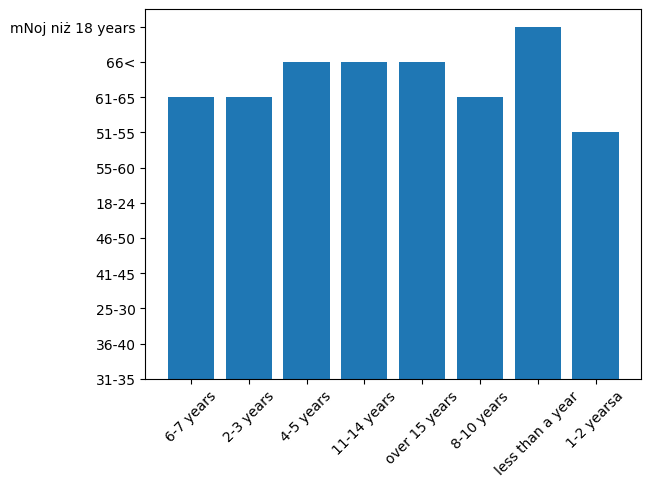

In [4]:
plt.bar(yoga_df["Length of practice"], yoga_df["Age"])
plt.xticks(rotation=45)

In [5]:
yoga_df["Stress_Relief"] = yoga_df["Effects"].str.contains("Stress Relief", case=False, na=False)
yoga_df["Stress_Relief"] = yoga_df["Stress_Relief"].map({True: "Yes", False: "no"})

yoga_df

yoga_df["Stress_Relief"].value_counts()

Stress_Relief
Yes    368
no     152
Name: count, dtype: int64

In [6]:
yoga_df["Stress_Reduction_Motivation"] = yoga_df["Motivation"].str.contains("Stress reduction", case=False, na=False)
yoga_df["Stress_Reduction_Motivation"] = yoga_df["Stress_Reduction_Motivation"].map({True: "Yes", False: "no"})
yoga_df

yoga_df["Stress_Reduction_Motivation"].value_counts()


Stress_Reduction_Motivation
no     278
Yes    242
Name: count, dtype: int64

In [7]:
yoga_df

,Length of practice,Motivation,Effects,sex,Age,Stress_Relief,Stress_Reduction_Motivation
0,6-7 years,Other motivation,"Improving mental health, Stress relief, Other",Women,31-35,Yes,no
1,2-3 years,"Need to stretch the body, Stress reduction","Stress relief, Relief of sleep problems",Women,36-40,Yes,Yes
2,2-3 years,"Stress reduction, Other motivation","Improve body flexibility, Stress relief",Men,36-40,Yes,Yes
3,4-5 years,"Need to stretch the body, Build strength , Str...","Improve body flexibility, Improving mental hea...",Women,25-30,Yes,Yes
4,11-14 years,Need to stretch the body,"Improve health, Improve body flexibility, Impr...",Women,36-40,Yes,no
...,...,...,...,...,...,...,...
515,4-5 years,"Need to stretch the body, Build strength , Str...","Muscle gain, Improve body flexibility, Improvi...",Women,31-35,no,Yes
516,4-5 years,"Build strength , Stress reduction, Personal de...","Improve health, Muscle gain, Improve body flex...",Women,31-35,no,Yes
517,2-3 years,Specific health needes,Spiritual development,Women,36-40,no,no
518,1-2 yearsa,Personal development,"Improve body flexibility, Improving mental hea...",Women,31-35,Yes,no


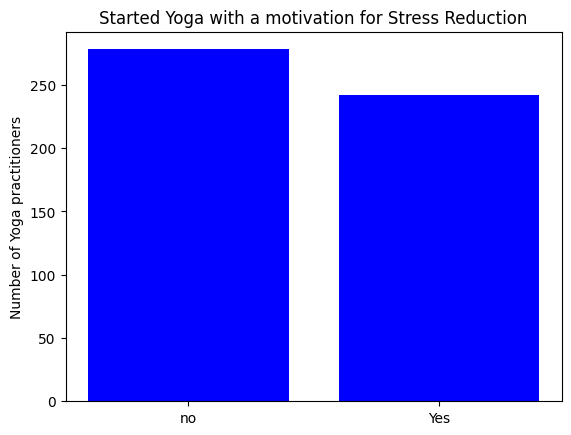

In [8]:
motivation = yoga_df["Stress_Reduction_Motivation"].value_counts()

plt.bar(motivation.index, motivation.values, color=["blue"])
plt.ylabel("Number of Yoga practitioners")
plt.title("Started Yoga with a motivation for Stress Reduction")
plt.show()

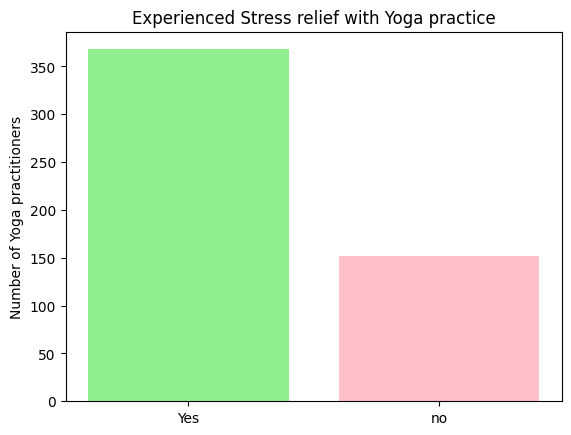

In [9]:
effect = yoga_df["Stress_Relief"].value_counts()

plt.bar(effect.index, effect.values, color=["lightgreen", "pink"])
plt.ylabel("Number of Yoga practitioners")
plt.title("Experienced Stress relief with Yoga practice")
plt.show()

In [10]:
yoga_df
length_values = yoga_df["Length of practice"].unique()
print(length_values)

print("----------------------------------")

value_counts = yoga_df["Length of practice"].value_counts()
print(value_counts)

['6-7 years' '2-3 years' '4-5 years' '11-14 years' 'over 15 years'
 '8-10 years' 'less than a year' '1-2 yearsa']
----------------------------------
Length of practice
less than a year    124
2-3 years           101
1-2 yearsa           98
4-5 years            75
6-7 years            34
11-14 years          33
8-10 years           32
over 15 years        23
Name: count, dtype: int64


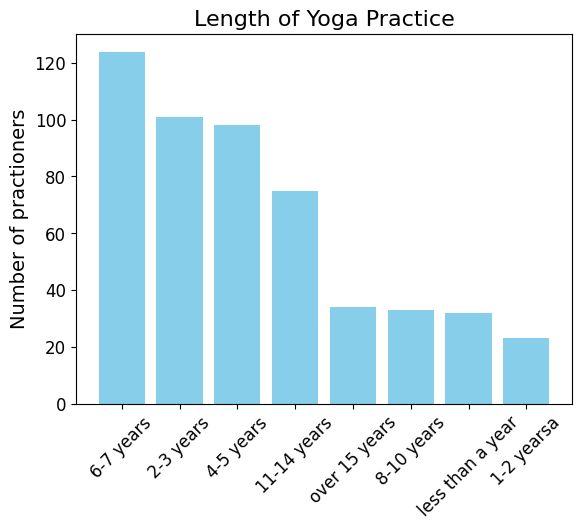

In [11]:
#custom_order = ["less than a year", "1-2 yearsa", "2-3 years", "4-5 years", "6-7 years", "8-10 years", "11-14 years", "over 15 years"]   

# yoga_df["Length of practice"] = pd.Categorical(yoga_df["Length of practice"], categories= custom_order, ordered= True)
# yoga_df_sorted = yoga_df.sort_values("Length of practice")

# new_value_counts = yoga_df_sorted["Length of practice"].value_counts()

# plt.bar(yoga_df_sorted["Length of practice"], new_value_counts)
# #plt.bar(yoga_df_sorted["Length of practice"], new_value_counts)
# plt.show()



# yoga_df = yoga_df.sort_values(by= "Length of practice")
# yoga_df["Length of practice"] = pd.to_numeric(yoga_df["Length of practice"], errors = "coerce")
# plt.bar(yoga_df["Length of practice"].unique(), yoga_df["Length of practice"].value_counts())
# plt.xticks(rotation = 40)




plt.bar(length_values, value_counts, color= "skyblue")
plt.xticks(rotation = 45, fontsize= 12)
plt.ylabel("Number of practioners", fontsize=14)

plt.yticks(fontsize= 12)
plt.title("Length of Yoga Practice", fontsize= 16)
plt.show()

Index([219, 327], dtype='int64')
    Length of practice                                         Motivation  \
0            6-7 years                                   Other motivation   
1            2-3 years         Need to stretch the body, Stress reduction   
2            2-3 years                 Stress reduction, Other motivation   
3            4-5 years  Need to stretch the body, Build strength , Str...   
4          11-14 years                           Need to stretch the body   
..                 ...                                                ...   
515          4-5 years  Need to stretch the body, Build strength , Str...   
516          4-5 years  Build strength , Stress reduction, Personal de...   
517          2-3 years                             Specific health needes   
518         1-2 yearsa                               Personal development   
519   less than a year                                   Stress reduction   

                                          

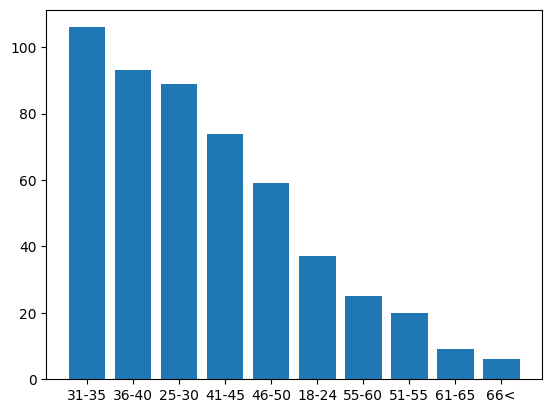

Text(0, 0.5, 'Number of Practitioners')

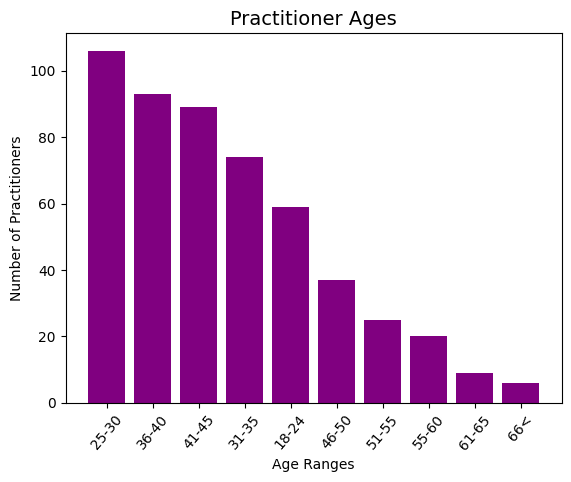

In [12]:
remove_list = yoga_df[yoga_df['Age'] == 'mNoj niż 18 years'].index
print(remove_list)
   
yoga_df = yoga_df.drop([219, 327])
print(yoga_df)

ages = yoga_df["Age"].unique()
print(ages)

ages_count = yoga_df["Age"].value_counts()
print(ages_count)


#ages put in order?  Havent tried this yet
# age_order = ['0-10', '11-20', '21-30', '31-40', '41-50']
# df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)



plt.bar(ages, ages_count)
plt.show()

plt.bar(ages_count.index, ages_count, color= "purple")
plt.xticks(rotation= 50)
plt.title("Practitioner Ages", fontsize= 14)
plt.xlabel("Age Ranges")
plt.ylabel("Number of Practitioners")
